In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("27-mall_customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

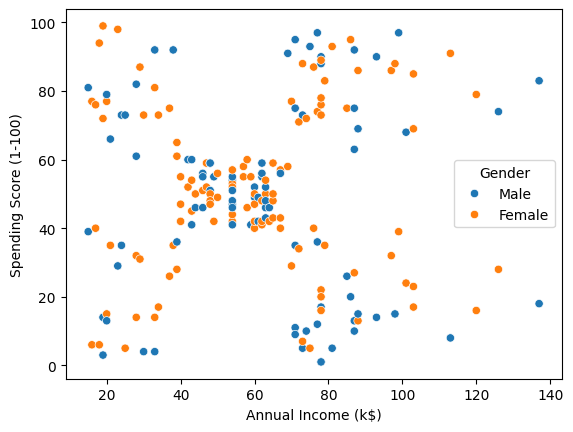

In [6]:
sns.scatterplot(df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")

In [7]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
df["Gender"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [10]:
df = df.drop("CustomerID", axis=1)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [13]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [14]:
df_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


In [15]:
import scipy.cluster.hierarchy as sch

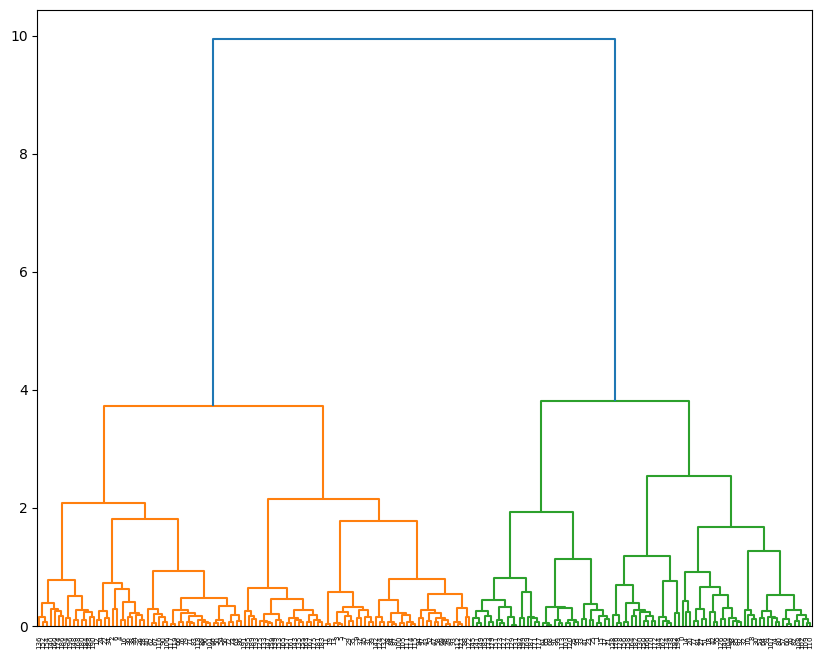

In [16]:
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method="ward"))

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
hc = AgglomerativeClustering(n_clusters=4)

In [19]:
y_hc = hc.fit_predict(df_scaled)

In [20]:
y_hc

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2])

In [21]:
df_scaled["Cluster"] = y_hc

In [22]:
df_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,0.019231,0.000000,0.387755,0
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008197,0.051020,3
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,3
...,...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918,1
196,0.0,0.519231,0.909836,0.275510,3
197,1.0,0.269231,0.909836,0.744898,2
198,1.0,0.269231,1.000000,0.173469,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

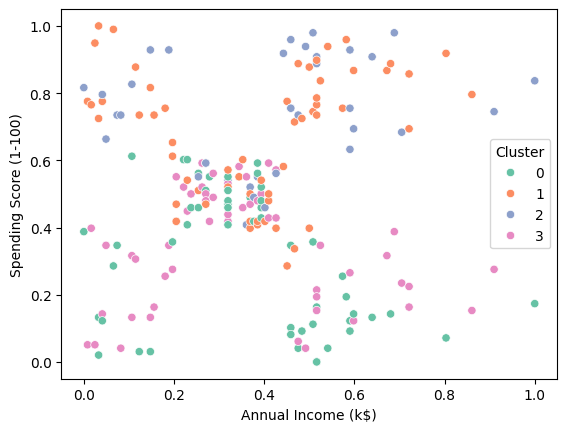

In [23]:
sns.scatterplot(df_scaled, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set2")

In [24]:
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,0.019231,0.000000,0.387755,0
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008197,0.051020,3
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,3


In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled, y_hc)

np.float64(0.7143503785893516)

In [26]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].copy()
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [27]:
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(X)
X["Cluster"] = y_hc

In [28]:
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

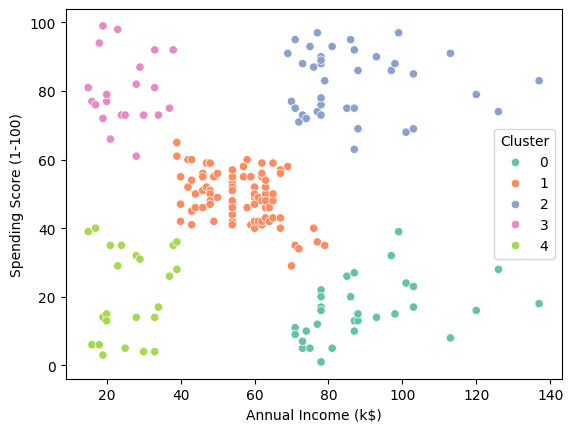

In [29]:
sns.scatterplot(X, x="Annual Income (k$)",y="Spending Score (1-100)", hue="Cluster", palette="Set2")

In [30]:
silhouette_score(X, y_hc)

np.float64(0.5537060749833154)

In [31]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [32]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [36]:
features_2d = ["Annual Income (k$)","Spending Score (1-100)"]
features_3d = ["Age","Annual Income (k$)","Spending Score (1-100)"]
features_4d = ["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]

for feats in [features_2d, features_3d, features_4d]:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)
    hc = AgglomerativeClustering(n_clusters=5)
    y_hc = hc.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)
    print(f"\n features :{feats}")
    print("Silhoutte score: ", sil)
    print("Davies Bouldin score: ", db)
    print("Calinski Harabasz score: ", ch)
    print("-------------")


 features :['Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.5582698727196419
Davies Bouldin score:  0.5734519252471811
Calinski Harabasz score:  258.97400737720704
-------------

 features :['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.3955454334726547
Davies Bouldin score:  0.8746143334035464
Calinski Harabasz score:  123.99070840826577
-------------

 features :['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.35032447507156306
Davies Bouldin score:  1.0941951795238571
Calinski Harabasz score:  163.46602356383625
-------------
